In [1]:
import os

In [2]:
import os
import json

def get_dataset_info(base_path):
    datasets = []
    train_sizes = []
    num_features = []
    cat_features = []
    num_tot_features = []
    
    # Get all directories
    for dirname in os.listdir(base_path):
        dir_path = os.path.join(base_path, dirname)
        
        # Check if it's a directory
        if os.path.isdir(dir_path):
            json_path = os.path.join(dir_path, 'info.json')
            
            # Check if info.json exists
            if os.path.exists(json_path):
                try:
                    with open(json_path, 'r') as f:
                        info = json.load(f)
                    
                    # Append values to respective lists
                    datasets.append(dirname)
                    train_sizes.append(info.get('train_size'))
                    num_features.append(info.get('n_num_features'))
                    cat_features.append(info.get('n_cat_features'))
                    num_tot_features.append(info.get('n_num_features') + info.get('n_cat_features'))
                except Exception as e:
                    print(f"Error processing {dirname}: {str(e)}")
    
    return datasets, train_sizes, num_features, cat_features, num_tot_features

# Usage
base_path = './datasets'
datasets, train_sizes, num_features, cat_features, num_tot_features = get_dataset_info(base_path)

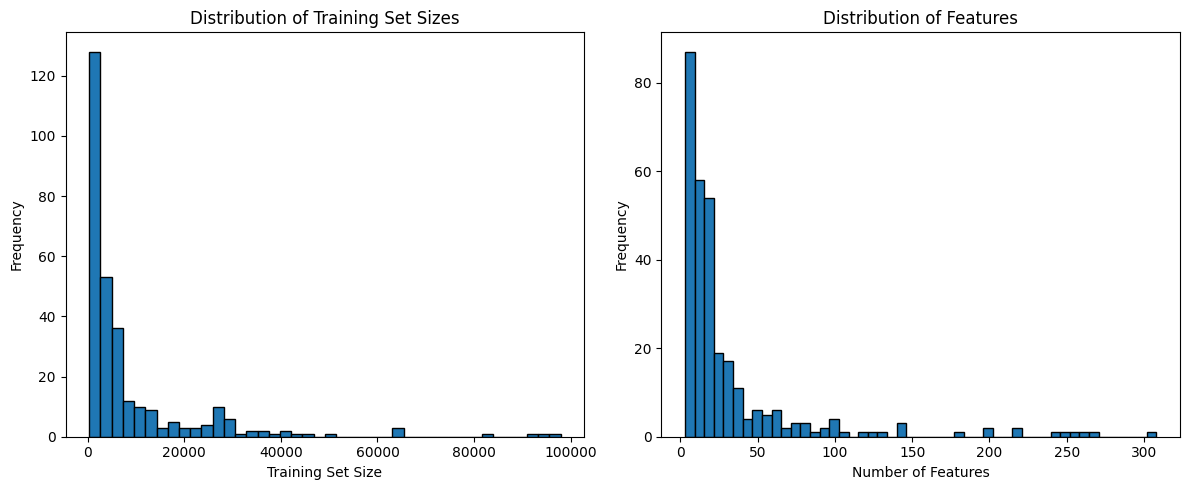

Train sizes stats:
Mean: 9038.96
Median: 3280.00
Min: 323
Max: 97922

Number of features stats:
Mean: 25.68
Median: 10.00
Min: 0
Max: 308


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(train_sizes, num_features):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot train sizes histogram
    ax1.hist(train_sizes, bins='auto', edgecolor='black')
    ax1.set_title('Distribution of Training Set Sizes')
    ax1.set_xlabel('Training Set Size')
    ax1.set_ylabel('Frequency')
    
    # Plot number of features histogram
    ax2.hist(num_features, bins='auto', edgecolor='black')
    ax2.set_title('Distribution of Features')
    ax2.set_xlabel('Number of Features')
    ax2.set_ylabel('Frequency')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Assuming you already have train_sizes and num_features lists from previous code
plot_histograms(train_sizes, num_tot_features)

# If you want to see some basic statistics as well:
print("Train sizes stats:")
print(f"Mean: {np.mean(train_sizes):.2f}")
print(f"Median: {np.median(train_sizes):.2f}")
print(f"Min: {np.min(train_sizes)}")
print(f"Max: {np.max(train_sizes)}")

print("\nNumber of features stats:")
print(f"Mean: {np.mean(num_features):.2f}")
print(f"Median: {np.median(num_features):.2f}")
print(f"Min: {np.min(num_features)}")
print(f"Max: {np.max(num_features)}")

In [6]:
large = [65_000 < x < 69_000 for x in train_sizes].count(True)
print(f"Count above 40k: {large}")

Count above 40k: 1
